In this notebook we will explore the Lorenz Attractor. We list several new functions for the development of Lorenz attractor images and animations. We hope to achieve an advanced simulation with cool graphics. Want to make something trippy. 

Long term research question: Can I find my own original strange attractor and can I log its properties, such as its equations, its basins of attraction, lyapunov exponents and others.

# Initialization

In [1]:
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png -vf "scale=1280:720" video.webm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import os
import sys
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from tqdm.notebook import tqdm

In [3]:
#We have this cell here to call the dataAnalysisLibrary module from one place rather than copy pasting into many other places
# the ../ means one directory back, which is, so this should fix pathing problems moving forward


sys.path.insert(0,'../Code/')
import simulationLibrary as sim
import dataAnalysisLibrary as dat

In [4]:
# clearDirectory() just clearned the "Images for simulation" directory so that we can save over it without any overlap
def clearDirectory(direc='../Images for simulation'):
    dir = direc
    for f in os.listdir(dir):
        os.remove(os.path.join(dir, f))

In [5]:
def renderVideo():
    target_directory = "../Images for Simulation"
    file_to_delete = "video.webm"
    os.chdir(target_directory)
    file_path = os.path.join(target_directory, file_to_delete)
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted {file_path}")
    else:
        print(f"{file_path} does not exist")
    
    command = 'ffmpeg -start_number 0 -framerate 60 -i graph%01d.png -vf "scale=1280:720" video.webm'
    # command = 'ffmpeg -start_number 0 -framerate 60 -i graph%01d.png -vf "scale=4:3" video.webm'
    os.system(command)

In [6]:
def attractorTraceGenerator(attractor, pos_init = np.array([1, 1, 1]), total_iterations = 100000, dt = 0.01):
    total_iterations = total_iterations
    dt = dt
    
    pos_init = pos_init
    attractor_trace = np.zeros((total_iterations+1,3))
    attractor_trace[0] = pos_init
    
    x = pos_init[0]
    y = pos_init[1]
    z = pos_init[2]
    
    for i in range(total_iterations):
        dx, dy, dz = attractor(x, y, z)
        x += dx*dt
        y += dy*dt
        z += dz*dt
        attractor_trace[i+1]=[x,y,z]

    return attractor_trace

# List of Known Attractors

In [7]:
# pos_init = np.array([1, 1, 1])

def lorenzAttractor(x, y, z, beta = 2.67, rho = 28, sigma = 10):
    dx = sigma*(y-x)
    dy = (x*(rho-z)-y)
    dz = x*y - beta*z
    return(np.array([dx, dy, dz]))

In [8]:
# pos_init = np.array([0.1, 1, 0])

def langfordAttractor(x, y, z, a = 0.95, b = 0.7, c = 0.6, d = 3.5, e = 0.25, f = 0.1):
    dx = (z-b)*x - d*y
    dy = d*x + (z-b)*y
    dz = c + a*z - (z**3)/3 - (x**2+y**2)*(1 + e*z) + (f*z*x**3)
    return(np.array([dx, dy, dz]))

In [9]:
# pos_init = np.array([1, 1, 1])

def rosslerAttractor(x, y, z, a = 0.2, b = 0.2, c = 5.7):
    dx = -y-z
    dy = x + a*y 
    dz = b+z*(x-c)
    return(np.array([dx, dy, dz]))

In [10]:
# pos_init = np.array([0.1, 0.1, 0.1])

def thomasAttractor(x, y, z, a = 0.208186):
    dx = -a*x + np.sin(y)
    dy = -a*y + np.sin(z)
    dz = -a*z + np.sin(x)
    return(np.array([dx, dy, dz]))

In [11]:
# pos_init = np.array([0.1, 0.1, 0.1])

def chuaAttractor(x, y, z, alpha = 9, beta = 14.286, m0 = -1.143, m1 = -0.714):
    h = m1*x + 0.5*(m0-m1)*(np.abs(x+1)-np.abs(x-1))
    
    dx = alpha*(y-x-h)
    dy = x-y+z
    dz = -beta*y
    return(np.array([dx, dy, dz]))

In [12]:
# pos_init = np.array([0.1, 0.1, 0.1])

def henonHeilesAttractor(x, y, z):
    dx = y
    dy = -x-2*x*z
    dz = -z-x**2+z**2
    return(np.array([dx, dy, dz]))

In [13]:
def halvorsenAttractor(x, y, z, alpha = 1.4):
    dx = -alpha*x - 4*y - 4*z - y**2
    dy = -alpha*y - 4*z - 4*x - z**2
    dz = -alpha*z - 4*x - 4*y - x**2
    return(np.array([dx, dy, dz]))

In [14]:
# pos_init = np.array([0.1, 1, 0])

def dadrasAttractor(x, y, z, a = 3, b = 2.7, c = 1.7, d = 2, e = 9):
    dx = y - a*x + b*y*z
    dy = c*y - x*z + z
    dz = d*x*y - e*z
    return(np.array([dx, dy, dz]))

In [15]:
# dt = 0.00001
# pos_init = np.array([5, 10, 10])

def chenLeeAttractor(x, y, z, alpha = 5, beta = -10, delta = -0.38):
    dx = alpha*x - y*z
    dy = beta*y + x*z
    dz = delta*z + (x*y)/3
    return(np.array([dx, dy, dz]))

In [16]:
# pos_init = np.array([1, 0, 4.5])

def rucklidgeAttractor(x, y, z, k = -2, l = -6.7):
    dx = k*x - l*y - y*z
    dy = x
    dz = -z + y**2
    return(np.array([dx, dy, dz]))

In [17]:
# pos_init = np.array([1, 1, 1])

def lorenz83Attractor(x, y, z, a = 0.95, b = 7.91, f = 4.83, g = 4.66):
    dx = -a*x - y**2 - z**2 + a*f
    dy = -y + x*y - b*x*z + g
    dz = -z + b*x*y + x*z
    return(np.array([dx, dy, dz]))

In [18]:
# pos_init = np.array([1, 1, 1])

def rabinovichFabrikantAttractor(x, y, z, alpha = 0.14, gamma = 0.1):
    dx = y*(z-1+x**2) + gamma*x
    dy = x*(3*z + 1 -x**2) + gamma*y
    dz = -2*z*(alpha + x*y)
    return(np.array([dx, dy, dz]))

In [19]:
# dt = 0.0001
# pos_init = np.array([-0.29, -0.25, -0.59])

def threeScrollAttractor(x, y, z, a = 32.48, b = 45.84, c = 1.18, d = 0.13, e = 0.57, f = 14.7):
    dx = a*(y-x) + d*x*z
    dy = b*x - x*z + f*y
    dz = c*z + x*y - e*x**2
    return(np.array([dx, dy, dz]))

In [20]:
# pos_init = np.array([0.63, 0.47, -0.54])

def sprottAttractor(x, y, z, a = 2, b = 2):
    dx = y + (a*x*y) + (x*z)
    dy = 1 - (b*np.power(x,2)) + (y*z)
    dz = x - (np.power(x,2)) - (np.power(y,2))
    return(np.array([dx, dy, dz]))

In [21]:
# pos_init = np.array([1, -1, 1])

def fourWingAttractor(x, y, z, a = 1, b = 1, m = 1):
    dx = a*x + y + y*z
    dy = -x*z + y*z
    dz = -z - m*x*y + b
    return(np.array([dx, dy, dz]))

In [22]:
# pos_init = np.array([0.0138, 0, -0.0138])

def sprottCaseAAttractor(x, y, z):
    dx = y
    dy = -x + y*z
    dz = 1 - np.power(y,2)
    return(np.array([dx, dy, dz]))

In [23]:
# pos_init = np.array([0, 0, 0])

def wangChenAttractor(x, y, z):
    dx = y*z + 0.006
    dy = np.power(x,2) - y
    dz = 1 - 4*x
    return(np.array([dx, dy, dz]))

In [24]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def boualiAttractor(x, y, z, alpha=3, beta=2.2, gamma=1, mu=0.001):
    dx = alpha*x*(1-y)-beta*z
    dy = -gamma*y*(1-np.power(x,2))
    dz = mu*x
    return(np.array([dx, dy, dz]))

In [25]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def burkeShawAttractor(x, y, z, s = 10, v = 4.272):
    dx = -s*(x+y)
    dy = -y-s*x*z
    dz = s*x*y + v
    return(np.array([dx, dy, dz]))

In [26]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def yuWangAttractor(x, y, z, a = 10, b = 40, c = 2, d = 2.5):
    dx = a*(y-x)
    dy = b*x-c*x*z
    dz = np.exp(x*y)-d*z
    return(np.array([dx, dy, dz]))

In [27]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def chenCelilovskyAttractor(x, y, z, a = 36, b = 3, c = 20):
    dx = a*(y-x)
    dy = c*y - x*z
    dz = x*y - b*z
    return(np.array([dx, dy, dz]))

In [28]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def denTsucsAttractor(x, y, z, a = 40, c = 0.833, d = 0.5, e = 0.65, f = 20):
    dx = a*(y-x)+d*x*z
    dy = f*y - x*z
    dz = c*z + x*y - e*np.power(x,2)
    return(np.array([dx, dy, dz]))

In [29]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def arneodoAttractor(x, y, z, a = -5.5, b = 3.5, c = -1.0):
    dx = y
    dy = z
    dz = -a*x - b*y - z + c*np.power(x,3)
    return(np.array([dx, dy, dz]))

In [30]:
# dt = 0.00001
# pos_init = np.array([1, 1, 0])

def dequanLiAttractor(x, y, z, alpha = 40, beta = 1.833, delta = 0.16, epsilon = 0.65, rho = 55, zeta = 20):
    dx = alpha*(y-x) + delta*x*z
    dy = rho*x + zeta*y - x*z
    dz = beta*z + x*y - epsilon*np.power(x,2)
    return(np.array([dx, dy, dz]))

In [31]:
# dt = 0.001
# pos_init = np.array([1, 1, 0])

def financeAttractor(x, y, z, alpha = 0.001, beta = 0.2, zeta = 1.1):
    dx = ((1/beta)-alpha)*x + z + x*y
    dy = -beta*y - np.power(x,2)
    dz = -x - zeta*z
    return(np.array([dx, dy, dz]))

In [32]:
# dt = 0.0001
# pos_init = np.array([0.1, 0.1, 0.1])

def genesioTesiAttractor(x, y, z, a1 = 1, a2 = 1.1, a3 = 0.44, a4 = 1):
    dx = y
    dy = z
    dz = -a1*x - a2*y - a3*z + a4*np.power(x,2)
    return(np.array([dx, dy, dz]))

In [33]:
# dt = 0.0001
# pos_init = np.array([0.1, 0.1, 0.1])

def hadleyAttractor(x, y, z, alpha=0.2, beta=4, zeta=8, delta=1):
    dx = -np.power(y,2)-np.power(z,3)-alpha*x+alpha*zeta
    dy = x*y-beta*x*z-y+delta
    dz = beta*x*y+x*z-z
    return(np.array([dx, dy, dz]))

In [34]:
def liuChenAttractor(x, y, z, alpha = 2.4, beta = -3.78, sigma = 14, delta = -11, epsilon = 4, zeta = 5.58, rho = 1):
    dx = alpha*y + beta*x + sigma*y*z
    dy = delta*y - z + epsilon*x*z
    dz = zeta*z+rho*x*y
    return(np.array([dx, dy, dz]))

In [35]:
# dt = 0.00001
# pos_init = np.array([-0.1, 0.5, -0.6])

def chenAttractor(x, y, z, a = 40, b = 3, c = 28):
    dx = a*(y-x)
    dy = (c-a)*x - x*z + c*y
    dz = x*y - b*z
    return(np.array([dx, dy, dz]))

In [36]:
def sprottLinzFAttractor(x, y, z, a = 0.5):
    dx = y + z
    dy = -x + a*y
    dz = np.power(x,2) - z
    return(np.array([dx, dy, dz]))

In [37]:
def sprottBAttraction(x, y, z, a = 0.4, b = 1.2, c =1):
    dx = a*y*z
    dy = x - b*y
    dz = c - x*y
    return(np.array([dx, dy, dz]))

# Video Generator

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

KeyboardInterrupt: 

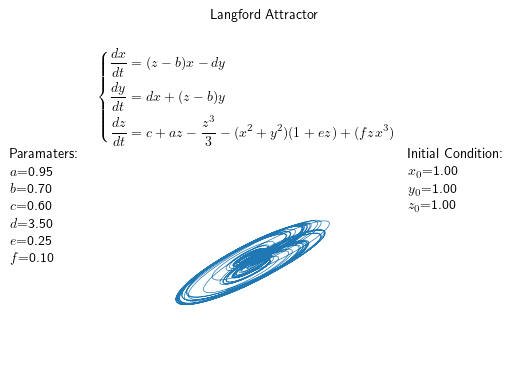

In [46]:
clearDirectory()

total_iterations = 1000000
# total_iterations = 1
dt = 0.0001

pos_init = np.array([1, 1, 1])
attractor_trace = np.zeros((total_iterations+1,3))
attractor_trace[0] = pos_init

x = pos_init[0]
y = pos_init[1]
z = pos_init[2]

for i in tqdm(range(total_iterations)):
    dx, dy, dz = langfordAttractor(x, y, z)
    x += dx*dt
    y += dy*dt
    z += dz*dt
    attractor_trace[i+1]=[x,y,z]

# Plot and save images with changing views
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# def langfordAttractor(x, y, z, a = 0.95, b = 0.7, c = 0.6, d = 3.5, e = 0.25, f = 0.1):
#     dx = (z-b)*x - d*y
#     dy = d*x + (z-b)*y
#     dz = c + a*z - (z**3)/3 - (x**2+y**2)*(1 + e*z) + (f*z*x**3)
#     return(np.array([dx, dy, dz]))

fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot(projection='3d')
ax.plot(attractor_trace[:, 0], attractor_trace[:, 1], attractor_trace[:, 2], lw=0.5)
ax.text2D(0.38, 1, "Langford Attractor", transform=ax.transAxes)
ax.text2D(0.32, 0.7, r"$\left\{\begin{aligned} \frac{dx}{dt} &= (z-b)x - dy \\ \frac{dy}{dt} &= dx + (z-b)y \\ \frac{dz}{dt} &= c + az -\frac{z^3}{3} - (x^2+y^2)(1 + ez) + (fzx^3) \end{aligned}\right.$", transform=fig.transFigure)
ax.text2D(-0.2, 0.60, "Paramaters:", transform=ax.transAxes)
ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(0.95)), transform=ax.transAxes)
ax.text2D(-0.2, 0.50, r"$b$="+str("{:.2f}".format(0.7)), transform=ax.transAxes)
ax.text2D(-0.2, 0.45, r"$c$="+str("{:.2f}".format(0.6)), transform=ax.transAxes)
ax.text2D(-0.2, 0.40, r"$d$="+str("{:.2f}".format(3.5)), transform=ax.transAxes)
ax.text2D(-0.2, 0.35, r"$e$="+str("{:.2f}".format(0.25)), transform=ax.transAxes)
ax.text2D(-0.2, 0.30, r"$f$="+str("{:.2f}".format(0.1)), transform=ax.transAxes)
ax.text2D(0.95, 0.60, "Initial Condition:", transform=ax.transAxes)
ax.text2D(0.95, 0.55, r"$x_0$="+str("{:.2f}".format(pos_init[0])), transform=ax.transAxes)
ax.text2D(0.95, 0.50, r"$y_0$="+str("{:.2f}".format(pos_init[1])), transform=ax.transAxes)
ax.text2D(0.95, 0.45, r"$z_0$="+str("{:.2f}".format(pos_init[2])), transform=ax.transAxes)
plt.xlim((-1,1))
plt.ylim((-5,5))
ax.set_zlim(0,20)
ax.set_axis_off()

for i in tqdm(range(360*5)):
    ax.view_init(15, i)
    plt.savefig('../Images for simulation/graph'+str(i)+'.png', dpi = 300)

plt.close()

renderVideo()

# Basin of Attraction

## Using cosine distances

### Generating a reference path

In [89]:
reference = attractorTraceGenerator(lorenzAttractor, total_iterations=10000, dt=0.01)
reference_flat = reference.flatten()

### Generating distance matrix

In [90]:
x = np.linspace(-5, 5, 100)  # 5 points from -1 to 1
y = np.linspace(-5, 5, 100)  # 5 points from -1 to 1
basin = np.zeros((len(x), len(y)))


for i in tqdm(range(len(x))):
    for j in range(len(y)):
        comparison = attractorTraceGenerator(rosslerAttractor, pos_init=np.array([x[i], y[j], 1]), total_iterations=10000, dt=0.01)
        basin[i][j] = dat.cosineSimilarity(comparison.flatten(), reference_flat)

100%|██████████████████████████████████████████████████████████████████| 100/100 [02:17<00:00,  1.37s/it]


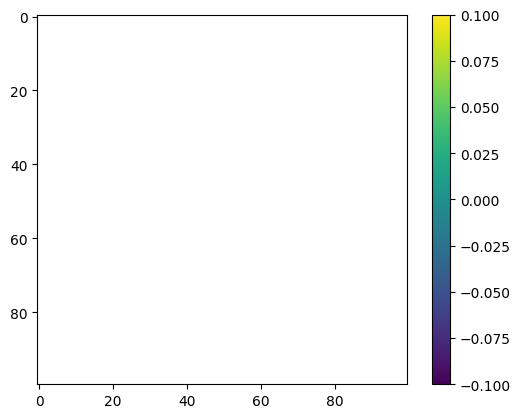

In [88]:
plt.imshow(basin)
colorbar = plt.colorbar()

## Lyapunov Exponents

seems like when it comes to stuff like this there are multiple mechanisms to chaos. One of them is stretching (lyapunov exponent) and the other is folding. Might be fun to look in to these ideas.

Motivation right now is to run lyapunov exponents on a set of initial conditions for different strange attractors to find under which initial conditions the best plots will be made is. That is, we are looking for the *basin of attraction for strange attractors*.

Thats an idea, isnt it? look at some region around the attractor and then calculate the distance from the final state of the center or region of that particular attractor.

In [39]:
# pos_init = np.array([1, 1, 1])

def lorenzAttractor(x, y, z, beta = 2.67, rho = 28, sigma = 10):
    dx = sigma*(y-x)
    dy = (x*(rho-z)-y)
    dz = x*y - beta*z
    return(np.array([dx, dy, dz]))

In [40]:
def jacobian_lorenz(x, y, z, sigma = 10, rho = 28, beta = 2.67):
    # Jacobian matrix of the Lorenz system
    return np.array([[-sigma, sigma, 0],
                     [rho - z, -1, -x],
                     [y, x, -beta]])

100it [05:31,  3.31s/it]


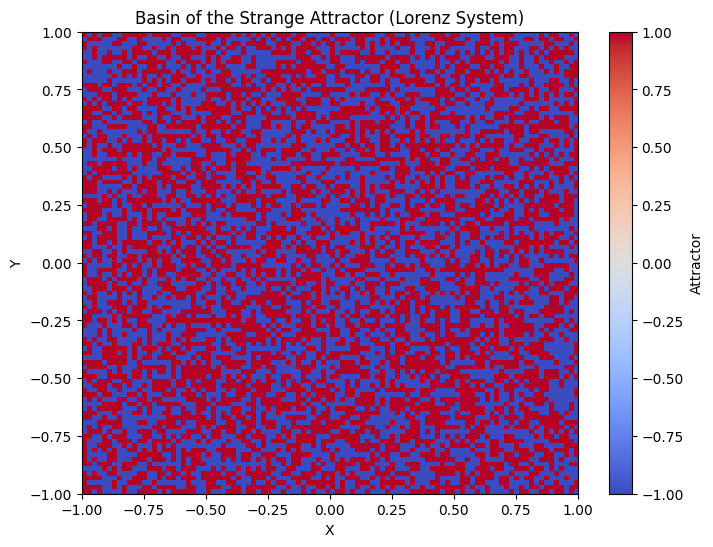

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def lorenz_system(state, t, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Define time grid
t = np.linspace(0, 100, 10000)  # Time from 0 to 100

# Create a grid of initial conditions
x_init_vals = np.linspace(-1, 1, 100)
y_init_vals = np.linspace(-1, 1, 100)

# Set up a grid to store basin of attraction results
basin_grid = np.zeros((len(x_init_vals), len(y_init_vals)))

# Integrate the system for each initial condition
for i, x_init in tqdm(enumerate(x_init_vals)):
    for j, y_init in enumerate(y_init_vals):
        initial_state = [x_init, y_init, 25]  # z_init = 25, just a random choice
        solution = odeint(lorenz_system, initial_state, t)
        
        # Check where the trajectory goes (i.e., classify which attractor it converges to)
        # For simplicity, we'll look at the final state of the trajectory
        x_final, y_final, z_final = solution[-1]
        
        # Classify convergence (example: if x_final > 0, color this point as 1, otherwise 0)
        if x_final > 0:
            basin_grid[i, j] = 1  # Converges to one attractor
        else:
            basin_grid[i, j] = -1  # Converges to another attractor (or stable region)

# Plot the basin of attraction
plt.figure(figsize=(8, 6))
plt.imshow(basin_grid, extent=[-1, 1, -1, 1], origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label="Attractor")
plt.title("Basin of the Strange Attractor (Lorenz System)")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# Old Stuff

## Lorenz Attractor

In [ ]:
# Not my own code, got it from DrM at https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html     
def lorenz(xyz, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

In [6]:
# lorenzAttractorImage() produces an image of a Lorenz Attractor System after 'length' amount of iterations. Also takes system parameters s, r, and b. Default value is just a known value that gives a known result to use as sanity checks
# 'save' parameter allows you to save the image incase you find something cool
def lorenzAttractorImage(length, s=10, r=28, b=2.667, save=False, clean=False, initPos=np.array([0,1,1.05])):
    dt = 0.01
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i],s,r,b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-25,25))
    plt.ylim((-30,35))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Lorenz Attractor")
        pass
    
    if save == True:
        plt.savefig('../Images for simulation/graph'+str(j)+'.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

In [7]:
# lorenzAttractorTrace() takes in the amount of frames you want to video to be along with the system paramters s, r and b. Default value is just a known value that gives a known result to use as sanity checks
# Will save images to target directory where you will then have to run ffmpeg through the command line to use. Ffmpeg comand is given in the next line
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

def lorenzAttractorTrace(frames, s=10, r=28, b=2.667, clean=False, rotation=False,initPos=np.array([0,1,1.05])):
    #Empty the target directory
    clearDirectory()

    #Calculate the array of points according to the lorenz system
    #Do this outside the main loop so that we only calculate it once rather than a bazillion times and annihilate memory
    dt = 0.01
    numSteps = frames

    xyzs = np.empty((numSteps+1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    for i in range(numSteps):
        xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i],s,r,b) * dt

    # Checking if the attractor is clean or not to determine what the first frame should look like     
    if clean == True:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.grid(None)
        ax.axis('off')
        plt.savefig('../../Physics-Simulations/Images for simulation/graph.png'+str(0)+'.png')
        plt.close('all')
    else:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Lorenz Attractor")
        plt.savefig('../..//Physics-Simulations/Images for simulation/graph.png'+str(0)+'.png')
        plt.close('all')
    
    #Non-rotation video
    if rotation == False:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        while frame < numSteps:
            ax = plt.figure().add_subplot(projection='3d')
            ax.plot(*xyzs[:frame].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.set_xlabel("X Axis")
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-25,25))
            plt.ylim((-30,35))
            ax.set_zlim(0,60)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Lorenz Attractor")
                pass
            plt.savefig('../../Physics-Simulations/Images for simulation/graph.png'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
    #Rotation video, add in the ax.view_init() function which takes in spherical coordinate
    else:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        angle = 0
        while frame < numSteps:
            ax = plt.figure().add_subplot(projection='3d')
            ax.plot(*xyzs[:frame].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.set_xlabel("X Axis")
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-25,25))
            plt.ylim((-30,35))
            ax.set_zlim(0,60)
            ax.view_init(30,angle)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Lorenz Attractor")
                pass
            plt.savefig('../..//Physics-Simulations/Images for simulation/graph.png'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
            angle = angle + 1

In [8]:
sim.lorenzAttractorTrace(200)

## Thomas Attractor

In [32]:
def thomas(xyz, b=0.208186):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = np.sin(y)-(b*x)
    y_dot = np.sin(z)-(b*y)
    z_dot = np.sin(x)-(b*z)
    return np.array([x_dot, y_dot, z_dot])

In [68]:
def thomasAttractorImage(length, b=0.208186, save=False, clean=False, initPos=np.array([0,0,0])):
    dt = 0.001
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + thomas(xyzs[i],b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-5,5))
    plt.ylim((-5,5))
    # plt.zlim((-5,5))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Thomas Attractor")
        pass
    
    if save == True:
        plt.savefig('../Images for simulation/graph.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

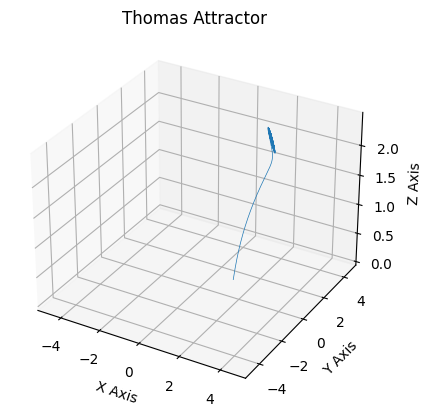

In [69]:
thomasAttractorImage(1000000, b=0.329, initPos = np.array([1.1,1.1,-0.01]))

## Rossler Attractor

In [ ]:
def rossler(xyz, a=0.2, b=0.2, c=5.7):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = -y-z
    y_dot = x+(a*y)
    z_dot = b+(z*(x-c))
    return np.array([x_dot, y_dot, z_dot])

In [ ]:
# lorenzAttractorImage() produces an image of a Lorenz Attractor System after 'length' amount of iterations. Also takes system parameters s, r, and b. Default value is just a known value that gives a known result to use as sanity checks
# 'save' parameter allows you to save the image incase you find something cool
def rosslerAttractorImage(length, a=0.2, b=0.2, c=5.7, save=False, clean=False, initPos=np.array([0,0,0])):
    dt = 0.01
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + rossler(xyzs[i],b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-12,12))
    plt.ylim((-12,12))
    # plt.zlim((-5,5))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Thomas Attractor")
        pass
    
    if save == True:
        plt.savefig('../Images for simulation/graph.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

In [ ]:
rosslerAttractorImage(4000)

In [ ]:
# lorenzAttractorTrace() takes in the amount of frames you want to video to be along with the system paramters s, r and b. Default value is just a known value that gives a known result to use as sanity checks
# Will save images to target directory where you will then have to run ffmpeg through the command line to use. Ffmpeg comand is given in the next line
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

def rosslerAttractorTrace(frames, a=0.2, b=0.2, c=10, clean=False, rotation=False,initPos=np.array([0,0,0])):
    #Empty the target directory
    clearDirectory()

    #Enable latex
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

    #Calculate the array of points according to the lorenz system
    #Do this outside the main loop so that we only calculate it once rather than a bazillion times and annihilate memory
    dt = 0.01
    numSteps = 25*frames

    xyzs = np.empty((numSteps+1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    for i in range(numSteps):
        xyzs[i + 1] = xyzs[i] + rossler(xyzs[i]) * dt

    # Checking if the attractor is clean or not to determine what the first frame should look like     
    if clean == True:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.grid(None)
        ax.axis('off')
        plt.savefig('../Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    else:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Rossler Attractor")
        plt.savefig('../Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    
    #Non-rotation video
    if rotation == False:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Rossler Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 0 & -1 & -1 \\  1 & \alpha & 0 \\ z & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('../Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
    #Rotation video, add in the ax.view_init() function which takes in spherical coordinate
    else:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        angle = 0
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Rossler Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 0 & -1 & -1 \\  1 & \alpha & 0 \\ z & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            ax.view_init(30,angle)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('../Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
            angle = angle + 1

In [ ]:
rosslerAttractorTrace(1500, c=14, clean=True, rotation=False)

## Aizawa Atractor

In [61]:
def aizawa(xyz, a=3, b=2.7, c=1.7, d=2, e=9):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = (z-b)*x-d*y
    y_dot = (d*x)+(z-b)*y
    z_dot = c+(a*z)-((z**3)/3)-((x**2+y**2)*(1+e*z)+f*z*(x**3))
    return np.array([x_dot, y_dot, z_dot])

In [62]:
# This completely blows up to infinity and i have no clue why. im using the same equations as on the website with the same exact parameters as well. Even turned down the step size and still get crazy results. 
def aizawaAttractorImage(length, a=0.95, b=0.7, c=0.6, d=3.5, e=0.25, f=0.1, save=False, clean=False, initPos=np.array([00.1,1,0.001])):
    dt = 0.001
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + dadras(xyzs[i],b) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    # plt.zlim((-5,5))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Aizawa Attractor")
        pass
    
    if save == True:
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

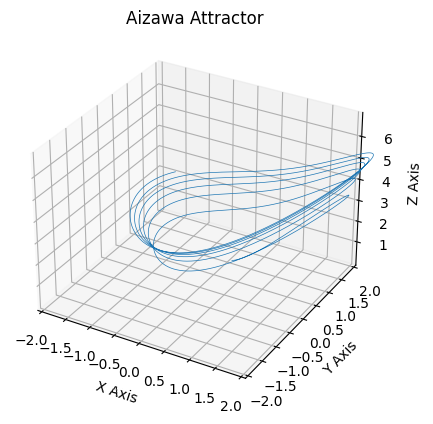

In [64]:
aizawaAttractorImage(10000)

In [ ]:
# lorenzAttractorTrace() takes in the amount of frames you want to video to be along with the system paramters s, r and b. Default value is just a known value that gives a known result to use as sanity checks
# Will save images to target directory where you will then have to run ffmpeg through the command line to use. Ffmpeg comand is given in the next line
# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

def aizawaAttractorTrace(frames, a=0.2, b=0.2, c=10, clean=False, rotation=False,initPos=np.array([0.1,1,0.01])):
    #Empty the target directory
    clearDirectory()

    #Enable latex
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

    #Calculate the array of points according to the lorenz system
    #Do this outside the main loop so that we only calculate it once rather than a bazillion times and annihilate memory
    dt = 0.01
    numSteps = 25*frames

    xyzs = np.empty((numSteps+1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    for i in range(numSteps):
        xyzs[i + 1] = xyzs[i] + aizawa(xyzs[i]) * dt

    # Checking if the attractor is clean or not to determine what the first frame should look like     
    if clean == True:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.grid(None)
        ax.axis('off')
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    else:
        #plot the first frame outside of the main loop, same idea as initial conditions just with a frame
        ax = plt.figure().add_subplot(projection='3d')
        ax.plot(*xyzs[0].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title("Rossler Attractor")
        plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(0)+'.png')
        plt.close('all')
    
    #Non-rotation video
    if rotation == False:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Rossler Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} 0 & -1 & -1 \\  1 & \alpha & 0 \\ z & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
    #Rotation video, add in the ax.view_init() function which takes in spherical coordinate
    else:
        #Initialize frame to 1 so that our indexing for xyzs in the main loop prints from 0-frame. If frame was 0 then we would be plotting xysz from xyzs[0] ot xyzs[0] which we cant do. We need atleast xyzs[0] to xyzs[1]
        frame = 1
        angle = 0
        while frame < numSteps/25:
            ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
            ax.plot(*xyzs[:(frame*25)].T, lw=0.5) #Recall this [:frame] notion means we plot the array from xyzs[0] to xyzs[frame]
            ax.text2D(0.3,1, "Aizawa Attractor", transform=ax.transAxes)
            ax.text2D(0,0.85, r"$\frac{d}{dx} \begin{bmatrix} x \\ y \\ z \end{bmatrix}=\begin{bmatrix} (z-b) & -d & 0 \\  d & z-b & 0 \\ -x() & 0 & -\gamma \end{bmatrix}\begin{bmatrix} x \\ y \\z \end{bmatrix}+\begin{bmatrix}0 \\ 0 \\ \beta \end{bmatrix}$", transform=ax.transAxes)
            ax.text2D(-0.2, 0.65, "Paramaters:", transform=ax.transAxes)
            ax.text2D(-0.2, 0.55, r"$a$="+str("{:.2f}".format(a)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.45, r"$b$="+str("{:.2f}".format(b)), transform=ax.transAxes)
            ax.text2D(-0.2, 0.35, r"$c$="+str("{:.2f}".format(c)), transform=ax.transAxes)
            ax.set_ylabel("Y Axis")
            ax.set_zlabel("Z Axis")
            plt.xlim((-12,12))
            plt.ylim((-12,12))
            ax.set_zlim(0,50)
            ax.view_init(30,angle)
            if clean == True:
                ax.grid(None)
                ax.axis('off')
            else:
                ax.set_title("Rossler Attractor")
                pass
            plt.savefig('C:/Users/darkb/Documents/Uidaho Classes/CS shit/Physics-Simulations/Images for simulation/graph'+str(frame)+'.png', dpi=300) # dpi argument increases resolution
            plt.close('all')
            frame = frame + 1
            angle = angle + 1

In [ ]:
aizawaAttractorTrace(5, clean=True, rotation=True)

## Dadras Attractor

In [14]:
# Dadras Attractor
def dadras(xyz, a=0.95, b=0.7, c=0.6, d=3.5, e=0.25):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = y-(a*x)+(b*y*z)
    y_dot = (c*y)-(x*z)+z
    z_dot = (d*x*y)-(e*z)
    return np.array([x_dot, y_dot, z_dot])

In [29]:
def dadrasAttractorImage(length, a=3, b=2.7, c=1.7, d=2, e=9, save=False, clean=False, initPos=np.array([1.1,2.1,-2])):
    dt = 0.001
    num_steps = length

    xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
    xyzs[0] = initPos  # Set initial values
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        xyzs[i + 1] = xyzs[i] + dadras(xyzs[i],a,b,c,d,e) * dt

    # Plot
    ax = plt.figure().add_subplot(projection='3d')

    ax.plot(*xyzs.T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    # ax.text2D(0.05, 0.95, r"$\sigma$="+str("{:.2f}".format(s)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.0, r"$\rho$="+str("{:.2f}".format(r)), transform=ax.transAxes)
    # ax.text2D(0.05, 1.05, r"$\beta$="+str("{:.2f}".format(b)), transform=ax.transAxes)
    # ax.text2D(0.75, 0.95, r"$x$="+str("{:.3f}".format(xyzs[0][0])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.0, r"$y$="+str("{:.2f}".format(xyzs[0][1])), transform=ax.transAxes)
    # ax.text2D(0.75, 1.05, r"$z$="+str("{:.2f}".format(xyzs[0][2])), transform=ax.transAxes)
    plt.xlim((-10,10))
    plt.ylim((-10,10))
    if clean == True:
        ax.grid(None)
        ax.axis('off')
    else:
        ax.set_title("Lorenz Attractor")
        pass
    
    if save == True:
        plt.savefig('../Images for simulation/graph'+str(j)+'.png', dpi=300)
        plt.close('all')
    else:
        plt.show()

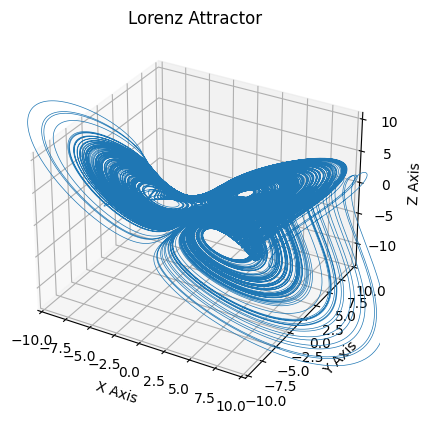

In [31]:
dadrasAttractorImage(1000000)